In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.7.0


[['Pullover' 'Trouser' 'Bag' 'Coat' 'Trouser']
 ['Ankle boot' 'Pullover' 'Pullover' 'T-shirt/top' 'Pullover']
 ['Shirt' 'Ankle boot' 'T-shirt/top' 'Sneaker' 'Sandal']
 ['Coat' 'T-shirt/top' 'Trouser' 'Bag' 'T-shirt/top']
 ['Coat' 'Pullover' 'Shirt' 'Sneaker' 'T-shirt/top']]


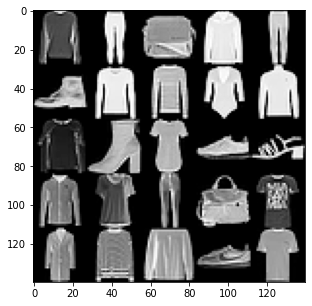

In [44]:
import tensorflow_datasets as tfds

data_train = tfds.load(name="fashion_mnist", split="train").prefetch(60000).cache()
data_test  = tfds.load(name="fashion_mnist", split="test" ).prefetch(10000).cache()

# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 25 images
sample_data = next(iter(data_train.batch(25)))
sample_images = sample_data['image']
sample_labels = sample_data['label']

# Plot the images in a 5x5 grid
plt.figure(figsize=(5, 5))
plt.imshow(
    sample_images.numpy().reshape(5, 5, 28, 28).transpose((0, 2, 1, 3)).reshape(140, 140),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(5, 5)])

# Task 1 (5 points + 1 point for the short comment)

Fill the gaps below to build a convolutional neural network and classify the images. Write a short comment on the validation metric images that you should obtain in the last cell.

Some hints for classes:
 - `tf.keras.layers.Conv2D` - convolutional layer
 - `tf.keras.layers.MaxPool2D` - maxpool layer
 - `tf.keras.layers.BatchNormalization` - batchnorm layer
 - `tf.keras.layers.Dropout` - dropout layer
 - `tf.keras.layers.Reshape` - reshaping layer (to convert the image-like representation to a vector-like representation deep down in the network

Try to follow the general deep convolutional architecture:
 - combine convolutions with maxpoolings to reduce the spacial size of the representation
 - increase the number of filters as you go deeper
 - when the spacial size of your representation is small enough (1-2 pixels), convert (reshape) it to a vector and then use fully connected layers

As you do this task, try to answer the following questions to yourself:
 - should I place batchnorm before or after the activation function?
  - (to answer this one, think how inactive neurons would affect the batchnorm statistics)
 - should I add dropout before or after batchnorm?
  - (think how batchnorm and dropout might interfere)
 - do I need an activation for the output layer?
  - (check the loss function used)
 - does it make sense to add a dropout to the output layer?
  - (common sense)
 - is it a good idea to add a batchnorm to the output layer?
  - (in fact, I don't have a good answer to this one, but imo a batchnorm in the last layer might lead to weird effects)

________________________________________________________________________________

#### notes before starting, batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch.

*   should I place batchnorm before or after the activation function?
      
  *   According to https://blog.paperspace.com/busting-the-myths-about-batch-normalization . It has been found in practice that applying batch norm after the activation yields better results.   
  *    But In Andrew Ng’s Coursera course, he recommends performing batch-norm before ReLu which is the popular practice. 

so we will try both cases.


*   should I add dropout before or after batchnorm?
in https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf dropout is used after activation 
 
 do we will try two architectures


*    -> CONV -> BatchNorm -> activation -> Dropout -> CONV
*    -> CONV -> Activation-> BatchNorm  -> Dropout -> CONV




In [ ]:
# Our basic architecture that we will use 

#Conv2D ---> (MaxPooling2D)---> Flatten()--->Dense(100)---->Dense(10)


In [45]:
# will try batchnorm after activation 

def build_model1(use_batchnorm=False, dropout_rate=0.):
  """
  Fill in the layers below.

  If use_batchnorm is True, add a batchnorm layer to **every** convolution and
  dense layer (except for the output one).
  If dropout_rate > 0, add a dropout layer with `rate=dropout_rate` to **every**
  convolution and dense layer (except for the output one).
  """
  layers = []

  layers.append(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
   #<YOUR CODE> 
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if  dropout_rate > 0: layers.append(tf.keras.layers.Dropout(rate=dropout_rate))
  #<YOUR CODE>
  layers.append(tf.keras.layers.MaxPooling2D((2, 2)))
  layers.append(tf.keras.layers.Flatten())
  layers.append(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if  dropout_rate > 0: layers.append(tf.keras.layers.Dropout(rate=dropout_rate))
  layers.append(tf.keras.layers.Dense(10, activation='softmax'))
  model = tf.keras.Sequential(layers)
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])
  return model

In [46]:
# will also try batchnorm before activation 
#In Andrew Ng’s Coursera course, he recommends performing batch-norm before ReLu which is the popular practice.

def build_model2(use_batchnorm=False, dropout_rate=0.):
  """
  Fill in the layers below.

  If use_batchnorm is True, add a batchnorm layer to **every** convolution and
  dense layer (except for the output one).
  If dropout_rate > 0, add a dropout layer with `rate=dropout_rate` to **every**
  convolution and dense layer (except for the output one).
  """
  layers = []

  layers.append(tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
   #<YOUR CODE> 
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  layers.append(tf.keras.layers.Activation('relu'))
  if  dropout_rate > 0: layers.append(tf.keras.layers.Dropout(rate=dropout_rate))
  #<YOUR CODE>
  layers.append(tf.keras.layers.MaxPooling2D((2, 2)))
  layers.append(tf.keras.layers.Flatten())
  layers.append(tf.keras.layers.Dense(100, kernel_initializer='he_uniform'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  layers.append(tf.keras.layers.Activation('relu'))
  if  dropout_rate > 0: layers.append(tf.keras.layers.Dropout(rate=dropout_rate))
  layers.append(tf.keras.layers.Dense(10, activation='softmax'))
  model = tf.keras.Sequential(layers)
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])
  return model

The code below creates and trains a bunch of models, then plots their validation metrics.

In [48]:
configs = [
  dict(use_batchnorm=False, dropout_rate=0),
  dict(use_batchnorm=False, dropout_rate=0.01),
  dict(use_batchnorm=False, dropout_rate=0.05),
  dict(use_batchnorm=False, dropout_rate=0.5),
  dict(use_batchnorm=True, dropout_rate=0),
  dict(use_batchnorm=True, dropout_rate=0.01),
  dict(use_batchnorm=True, dropout_rate=0.05),
  dict(use_batchnorm=True, dropout_rate=0.5),
]

models = {str(config) : build_model1(**config) for config in configs}

In [49]:
batch_size = 512

def preprocess(x):
  return (tf.cast(x['image'], 'float32') / 255., x['label'])

for config, model in models.items():
  print("Working on model:", config)
  model.fit(x=data_train.map(preprocess).shuffle(60000).batch(batch_size), epochs=10,
            validation_data=data_test.map(preprocess).batch(4096))

Working on model: {'use_batchnorm': False, 'dropout_rate': 0}
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


118/118 [==============================] - 7s 16ms/step - loss: 0.5489 - sparse_categorical_accuracy: 0.8101 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.8616
Epoch 2/10
118/118 [==============================] - 2s 9ms/step - loss: 0.3408 - sparse_categorical_accuracy: 0.8798 - val_loss: 0.3463 - val_sparse_categorical_accuracy: 0.8780
Epoch 3/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.3225 - val_sparse_categorical_accuracy: 0.8828
Epoch 4/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2671 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.3035 - val_sparse_categorical_accuracy: 0.8920
Epoch 5/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2409 - sparse_categorical_accuracy: 0.9135 - val_loss: 0.2803 - val_sparse_categorical_accuracy: 0.8976
Epoch 6/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2218 - sparse_categorical_accuracy

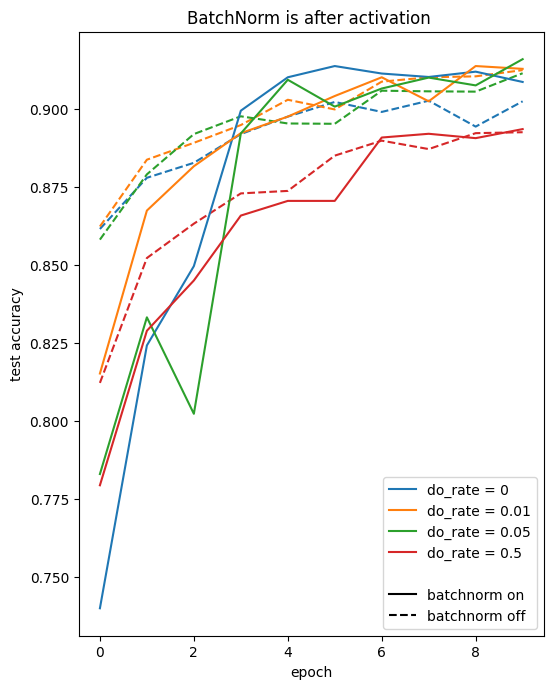

In [51]:
plt.figure(figsize=(6, 8), dpi=100)
color_cycle = iter(plt.rcParams['axes.prop_cycle'])

colors = {}

lines = []
labels = []
for config, model in models.items():
  config = eval(config)
  if config['dropout_rate'] not in colors:
    colors[config['dropout_rate']] = next(color_cycle)

  color = colors[config['dropout_rate']]['color']

  style = '-' if config['use_batchnorm'] else '--'
  line, = plt.plot(model.history.history['val_sparse_categorical_accuracy'], style,
                   c=color)
  
  if config['use_batchnorm']:
    lines.append(line)
    labels.append(f"do_rate = {config['dropout_rate']}")

plt.xlabel("epoch")
plt.ylabel("test accuracy");

from matplotlib.lines import Line2D

lines += [Line2D([0], [0], linestyle='-', color='w'),
          Line2D([0], [0], linestyle='-', color='k'),
          Line2D([0], [0], linestyle='--', color='k')]
labels += ['', 'batchnorm on', 'batchnorm off']
plt.title("BatchNorm is after activation ")
plt.legend(lines, labels);

Working on model: {'use_batchnorm': False, 'dropout_rate': 0}
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


118/118 [==============================] - 3s 10ms/step - loss: 0.5264 - sparse_categorical_accuracy: 0.8157 - val_loss: 0.3878 - val_sparse_categorical_accuracy: 0.8638
Epoch 2/10
118/118 [==============================] - 2s 9ms/step - loss: 0.3330 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3310 - val_sparse_categorical_accuracy: 0.8828
Epoch 3/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2908 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.3352 - val_sparse_categorical_accuracy: 0.8812
Epoch 4/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2638 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.2949 - val_sparse_categorical_accuracy: 0.8967
Epoch 5/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9123 - val_loss: 0.2894 - val_sparse_categorical_accuracy: 0.8975
Epoch 6/10
118/118 [==============================] - 2s 9ms/step - loss: 0.2258 - sparse_categorical_accuracy

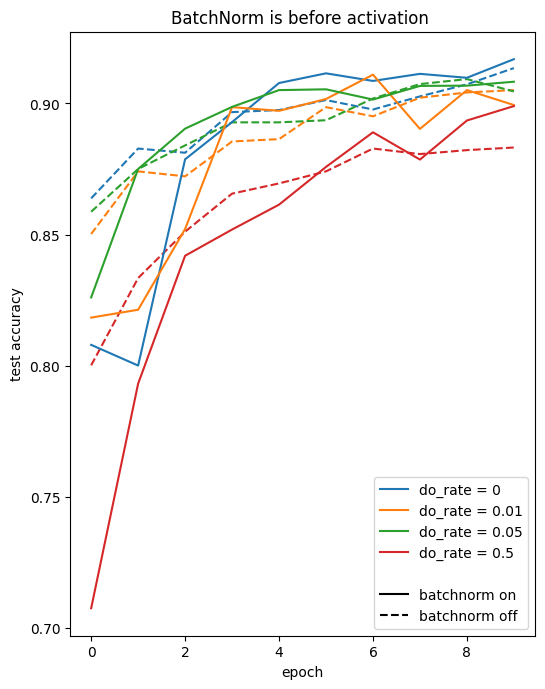

In [52]:
models = {str(config) : build_model2(**config) for config in configs}
batch_size = 512

def preprocess(x):
  return (tf.cast(x['image'], 'float32') / 255., x['label'])

for config, model in models.items():
  print("Working on model:", config)
  model.fit(x=data_train.map(preprocess).shuffle(60000).batch(batch_size), epochs=10,
            validation_data=data_test.map(preprocess).batch(4096))
  
plt.figure(figsize=(6, 8), dpi=100)
color_cycle = iter(plt.rcParams['axes.prop_cycle'])

colors = {}

lines = []
labels = []
for config, model in models.items():
  config = eval(config)
  if config['dropout_rate'] not in colors:
    colors[config['dropout_rate']] = next(color_cycle)

  color = colors[config['dropout_rate']]['color']

  style = '-' if config['use_batchnorm'] else '--'
  line, = plt.plot(model.history.history['val_sparse_categorical_accuracy'], style,
                   c=color)
  
  if config['use_batchnorm']:
    lines.append(line)
    labels.append(f"do_rate = {config['dropout_rate']}")

plt.xlabel("epoch")
plt.ylabel("test accuracy");

from matplotlib.lines import Line2D

lines += [Line2D([0], [0], linestyle='-', color='w'),
          Line2D([0], [0], linestyle='-', color='k'),
          Line2D([0], [0], linestyle='--', color='k')]
labels += ['', 'batchnorm on', 'batchnorm off']
plt.title("BatchNorm is before activation ")
plt.legend(lines, labels);

<YOUR SHORT COMMENT GOES HERE\>
The shows that we can converge much faster (lower number of epochs) to an optimal solution with batch normalization.
As for drop out rate one of the best rate to chose is 0.05 and the worst is 0.5 Also we can notice that aplying batch norm before or after activation does not make a noticable difference